In [103]:
import counterfeit_utils as cfu
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity

In [128]:
day_list = cfu.day_sales_from_db('nakamigos')['day'].unique()
intervals = cfu.compute_all_intervals('nakamigos',10,'objective_cf_num',remove_ders = True)
num_samples = 2
interval=10
tot_intervals = []
bandwidth=5
df = cfu.day_sales_from_db('nakamigos')
unique_values = np.array(sorted(df['day'].unique()))
ko_days = [pd.to_datetime(x[2]) for x in intervals[0]]
# print(ko_days)
# print(unique_values)
indices = []
for specific_datetime in ko_days:
    loc = np.where(unique_values == specific_datetime)[0]
    if loc:
        index = loc[0]
        indices.append(index)
# Creating and fitting the KDE

bw_scale = np.power(len(indices), -1/5)
print(bw_scale)
bw = bandwidth * bw_scale
kde = KernelDensity(bandwidth=bw,kernel='gaussian')
data = np.array(indices).reshape(-1, 1)
kde.fit(data)  # KDE expects data in 2D array format
# Sampling from the KDE
for x in range(0,num_samples):
    num_samples = 10
    samples = kde.sample(len(ko_days))
    round_samples = [round(x[0]) for x in samples]
    print(round_samples)
    intervals = []
    for x in round_samples:
        random_date = unique_values[x]
        intervals.append((random_date,cfu.compute_interval(interval,random_date,df)))
    tot_intervals.append(intervals)

0.4939741431709848
[15, 12, 7, 15, 96, 79, 15, 14, 50, 23, 9, 5, 25, 22, 18, 23, 192, 20, 19, 19, 187, 19, 29, 17, 100, 22, 11, 21, 14, 17, 9, 12, 8, 9, 19, 12, 14, 15, 21, 13, 16]
[12, 21, 189, 15, 17, 55, 6, 103, 9, 207, 11, 21, 37, 57, 192, 19, 11, 16, 207, 6, 14, 16, 17, 206, 7, 11, 205, 212, 15, 100, 15, 17, 19, 25, 27, 21, 12, 11, 206, 12, 204]


/tmp/ipykernel_1687566/218476536.py:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if loc:


In [21]:
ko_days = [pd.to_datetime(x[2]) for x in intervals[0]]

In [37]:
indices = []
for specific_datetime in ko_days:
    index = np.where(unique_values == specific_datetime)[0][0]
    if index==0:
        continue
    indices.append(index)

In [38]:
indices

[257, 236, 619, 251, 584, 542, 248, 358, 254, 399, 337, 242, 297, 557, 280]

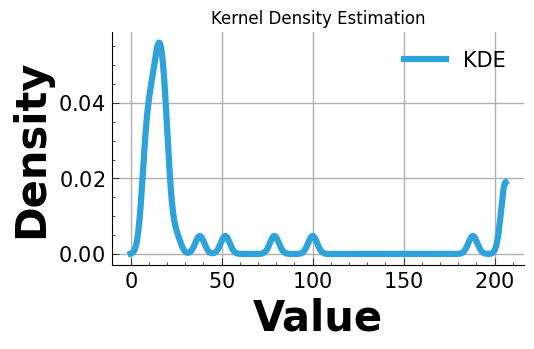

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Assuming you've already fit the KDE and have the model stored in 'kde'
# Generate data for plotting the KDE
x = np.linspace(0, max(data), 1000).reshape(-1, 1)  # assuming 'data' is your data

# Calculate the log density values
log_density = kde.score_samples(x)

# Plot the KDE
plt.plot(x, np.exp(log_density), label='KDE')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Kernel Density Estimation')
plt.legend()
plt.show()

In [79]:
tot_intervals

[[(Timestamp('2023-01-27 00:00:00'), (1.33, 1.32)),
  (Timestamp('2023-06-02 00:00:00'), (3.4600000000000004, 3.16)),
  (Timestamp('2023-03-18 00:00:00'), (1.2200000000000002, 1.09)),
  (Timestamp('2022-05-14 00:00:00'), (0.5, 0.9)),
  (Timestamp('2023-06-30 00:00:00'), (2.9600000000000004, 2.73)),
  (Timestamp('2022-12-08 00:00:00'), (0.5769500000000001, 0.7100000000000001)),
  (Timestamp('2023-05-22 00:00:00'), (4.5, 3.4694450000000003)),
  (Timestamp('2022-10-23 00:00:00'), (0.41400000000000003, 0.444)),
  (Timestamp('2023-05-28 00:00:00'), (3.2, 3.41355)),
  (Timestamp('2023-03-05 00:00:00'), (1.1700000000000002, 1.23)),
  (Timestamp('2023-05-23 00:00:00'), (4.2, 3.4200000000000004)),
  (Timestamp('2023-04-08 00:00:00'), (1.85, 1.935)),
  (Timestamp('2023-02-16 00:00:00'), (1.4440000000000002, 1.35)),
  (Timestamp('2023-04-27 00:00:00'), (2.588, 3.3600000000000003)),
  (Timestamp('2022-11-21 00:00:00'),
   (0.47000000000000003, 0.6900000000000001)),
  (Timestamp('2023-05-12 00:00:0